# Overview

### This project demonstrates how to predict housing prices using **Linear Regression** and other models for Comparison on a real-world dataset


## Datasets

### I will be using Housing Prices Dataset accuried from Kaggle

## Necessary libraries

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix , classification_report , accuracy_score , mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
import os
import warnings
warnings.filterwarnings("ignore")

## loading the Datasets

In [453]:
housing_df = pd.read_csv(r"C:/Users/mujta/Downloads/Real_PROJECTS/Housing_Price_Predictor/Housing.csv")

# EDA and Data Cleaning for Housing dataset

In [454]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [455]:
housing_df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [456]:
housing_df.shape

(545, 13)

In [457]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [458]:
housing_df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [459]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [460]:
housing_df.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [461]:
housing_df.prefarea.value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [462]:
housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [463]:
for i in housing_df.columns:
    print(f"\nColumn: {i}")
    print(housing_df[i].value_counts())


Column: price
price
4200000    17
3500000    17
4900000    12
5250000     9
5600000     9
           ..
2135000     1
1960000     1
1855000     1
1820000     1
1767150     1
Name: count, Length: 219, dtype: int64

Column: area
area
6000    24
3000    14
4500    13
4000    11
6600     9
        ..
3360     1
1700     1
3649     1
2990     1
3620     1
Name: count, Length: 284, dtype: int64

Column: bedrooms
bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

Column: bathrooms
bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

Column: stories
stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

Column: mainroad
mainroad
yes    468
no      77
Name: count, dtype: int64

Column: guestroom
guestroom
no     448
yes     97
Name: count, dtype: int64

Column: basement
basement
no     354
yes    191
Name: count, dtype: int64

Column: hotwaterheating
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Colum

In [464]:
housing_df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = housing_df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].applymap({'no': 0, 'yes': 1}.get)
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [465]:
housing_df = pd.get_dummies(housing_df, columns=['furnishingstatus'], drop_first=True)
housing_df = housing_df.astype(int)

In [466]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


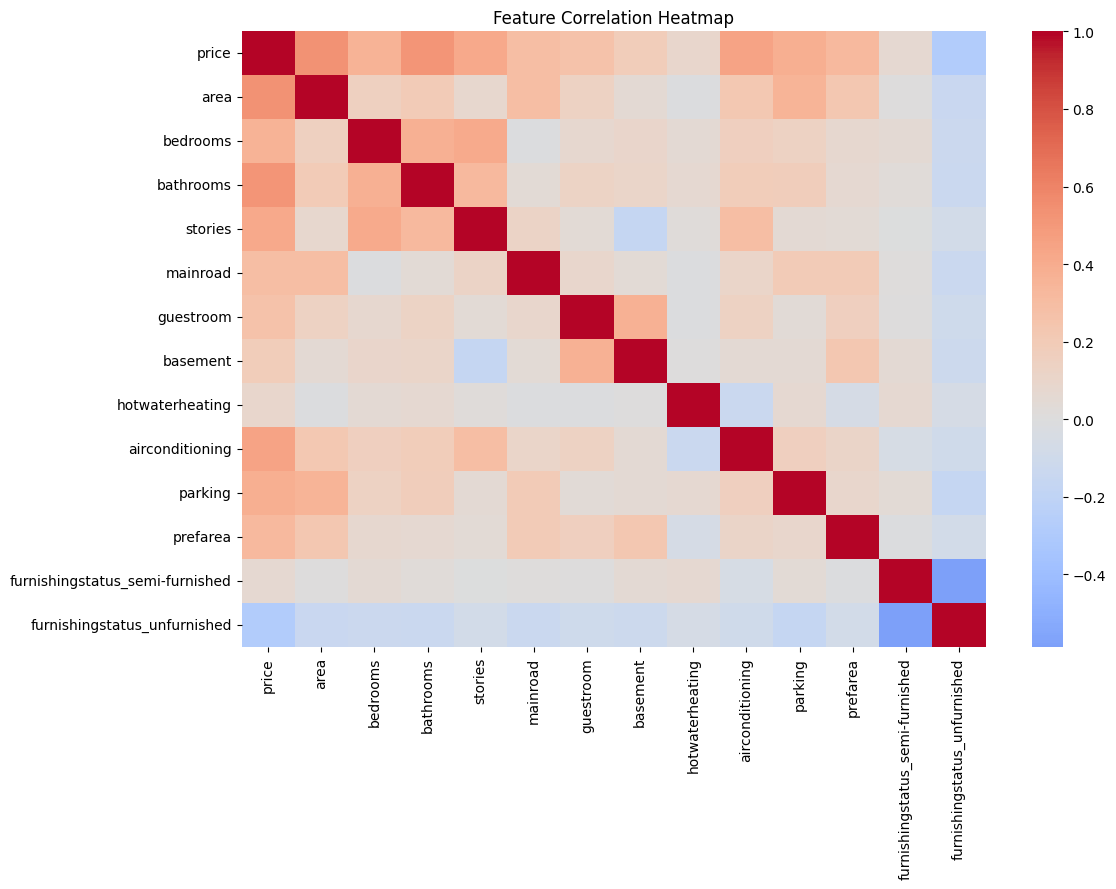

In [467]:
plt.figure(figsize=(12,8))
sns.heatmap(housing_df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

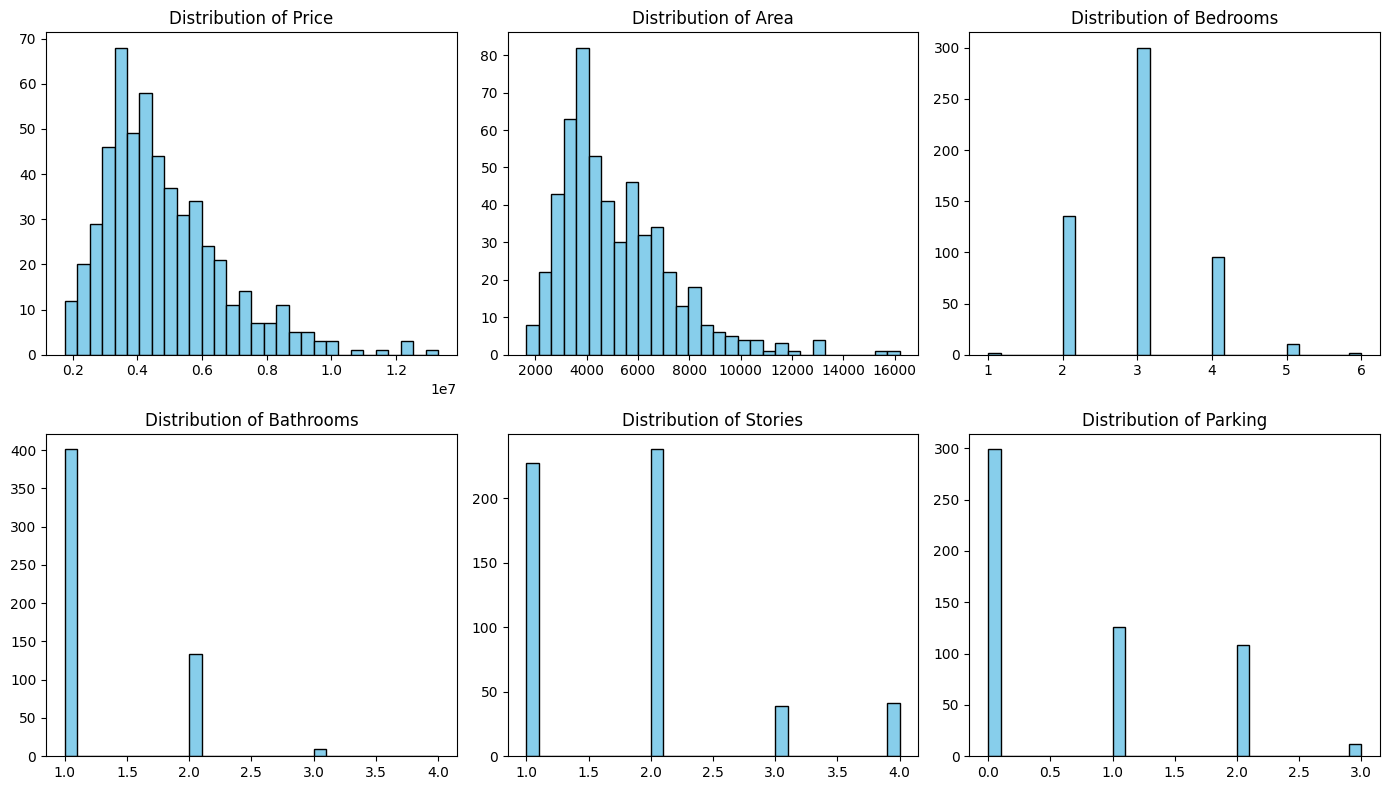

In [468]:
plt.figure(figsize=(14,8))

plt.subplot(2,3,1)
plt.hist(housing_df["price"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Price")

plt.subplot(2,3,2)
plt.hist(housing_df["area"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Area")

plt.subplot(2,3,3)
plt.hist(housing_df["bedrooms"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Bedrooms")

plt.subplot(2,3,4)
plt.hist(housing_df["bathrooms"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Bathrooms")

plt.subplot(2,3,5)
plt.hist(housing_df["stories"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Stories")

plt.subplot(2,3,6)
plt.hist(housing_df["parking"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Parking")

plt.tight_layout()
plt.show()

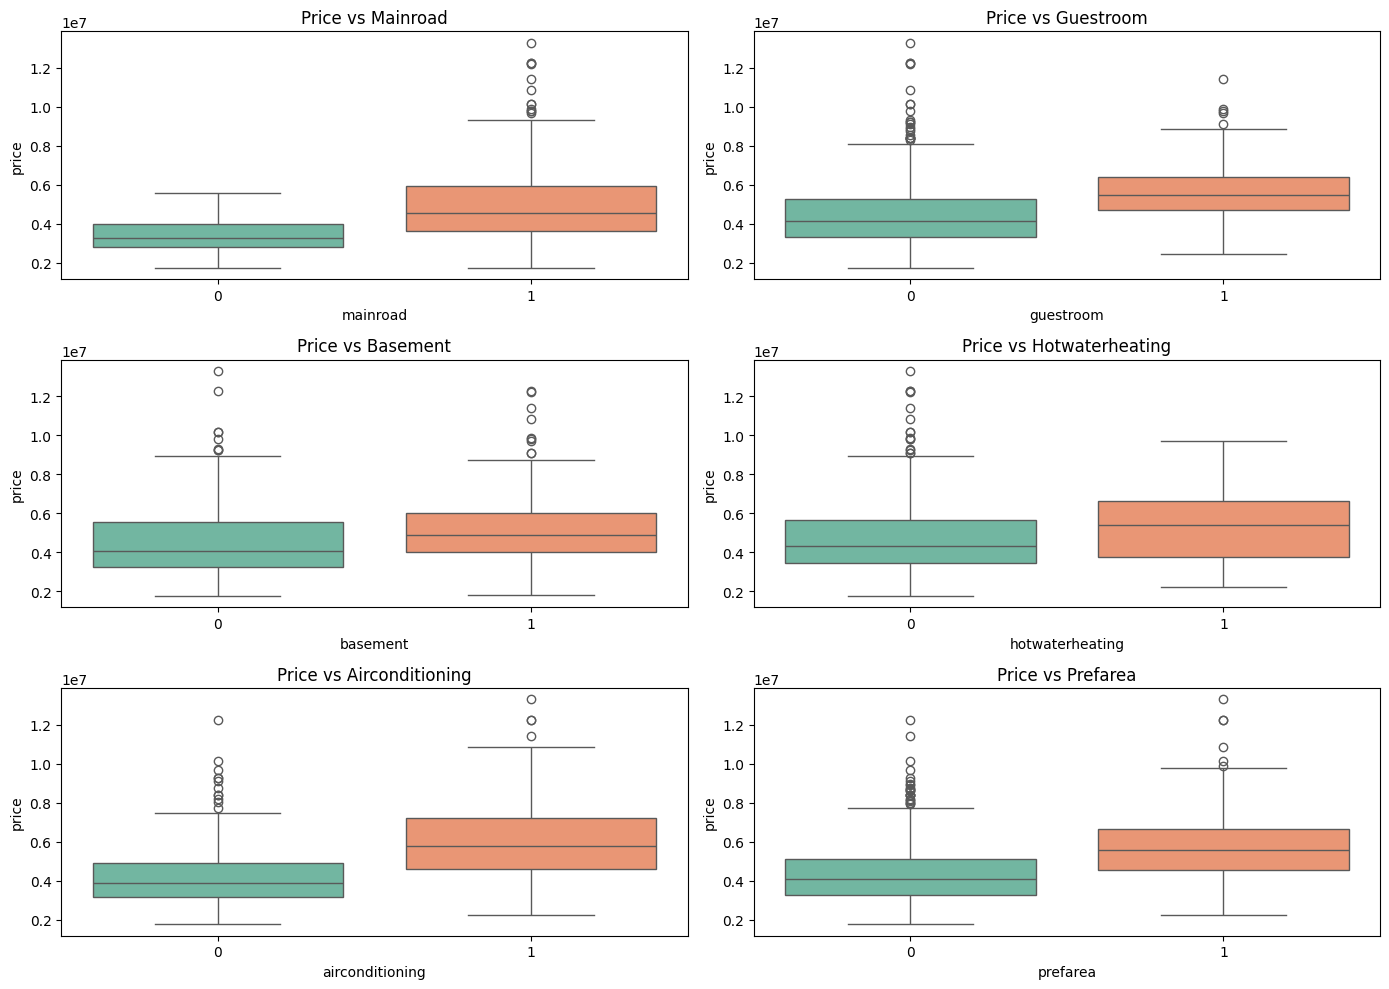

In [469]:
plt.figure(figsize=(14,10))

plt.subplot(3,2,1)
sns.boxplot(x="mainroad", y="price", data=housing_df, palette="Set2")
plt.title("Price vs Mainroad")

plt.subplot(3,2,2)
sns.boxplot(x="guestroom", y="price", data=housing_df, palette="Set2")
plt.title("Price vs Guestroom")

plt.subplot(3,2,3)
sns.boxplot(x="basement", y="price", data=housing_df, palette="Set2")
plt.title("Price vs Basement")

plt.subplot(3,2,4)
sns.boxplot(x="hotwaterheating", y="price", data=housing_df, palette="Set2")
plt.title("Price vs Hotwaterheating")

plt.subplot(3,2,5)
sns.boxplot(x="airconditioning", y="price", data=housing_df, palette="Set2")
plt.title("Price vs Airconditioning")

plt.subplot(3,2,6)
sns.boxplot(x="prefarea", y="price", data=housing_df, palette="Set2")
plt.title("Price vs Prefarea")

plt.tight_layout()
plt.show()

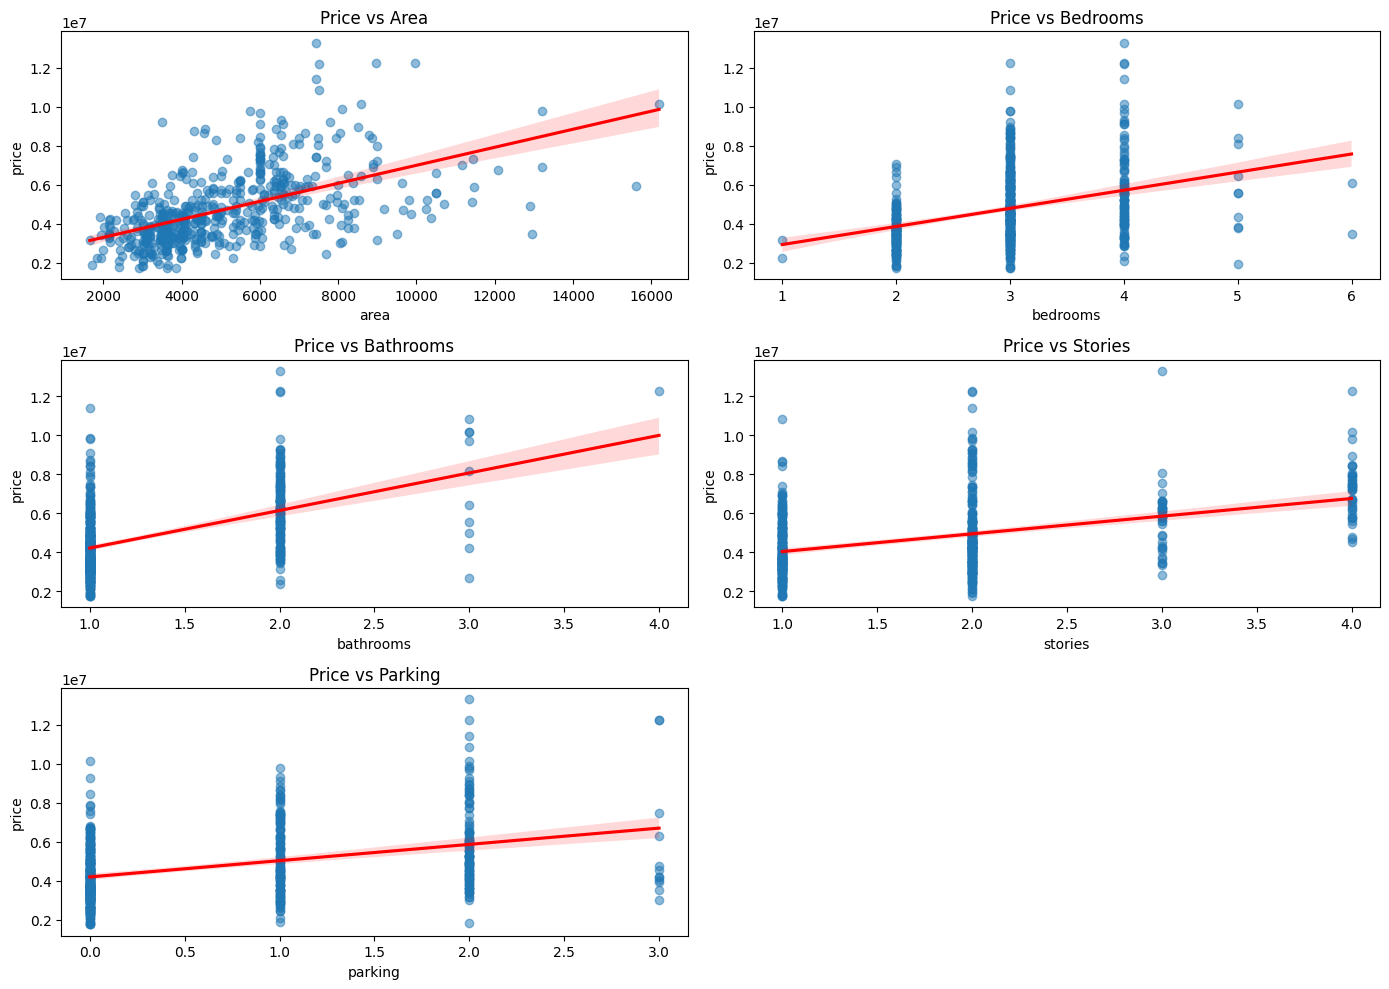

In [470]:
plt.figure(figsize=(14,10))

# Price vs Area
plt.subplot(3,2,1)
sns.regplot(x="area", y="price", data=housing_df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Price vs Area")

# Price vs Bedrooms
plt.subplot(3,2,2)
sns.regplot(x="bedrooms", y="price", data=housing_df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Price vs Bedrooms")

# Price vs Bathrooms
plt.subplot(3,2,3)
sns.regplot(x="bathrooms", y="price", data=housing_df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Price vs Bathrooms")

# Price vs Stories
plt.subplot(3,2,4)
sns.regplot(x="stories", y="price", data=housing_df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Price vs Stories")

# Price vs Parking
plt.subplot(3,2,5)
sns.regplot(x="parking", y="price", data=housing_df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Price vs Parking")

plt.tight_layout()
plt.show()

## Splitting data

In [471]:
X = housing_df.drop(columns="price")
y = housing_df["price"]

In [472]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , random_state = 2022)

## Linear Regression Model

In [473]:
# Linear Regression (with No log)

lr = make_pipeline(StandardScaler(), LinearRegression())
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [474]:
LR_results_df = pd.DataFrame({"Actual_Price": y_test,
                              "LR_Predicted": y_pred},
                             index=y_test.index)

In [475]:
LR_results_df.head()

,Actual_Price,LR_Predicted
172,5250000,7.058534e+06
209,4900000,3.400854e+06
248,4543000,4.786284e+06
497,2660000,2.710337e+06
463,3080000,3.132688e+06


In [476]:
LR_no_log_MAE = mean_absolute_error(y_test, y_pred)
LR_no_log_MSE = mean_squared_error(y_test, y_pred)
LR_no_log_RMSE = np.sqrt(LR_no_log_MSE)
LR_no_log_R2 = r2_score(y_test, y_pred)
LR_no_log_MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [477]:
print(f"LR_no_log_MAE: {LR_no_log_MAE: .1f}")
print(f"LR_no_log_MSE: {LR_no_log_MSE: .1f}")
print(f"LR_no_log_RMSE: {LR_no_log_RMSE: .1f}")
print(f"LR_no_log_R²: {LR_no_log_R2: .3f}")
print(f"LR_no_log_MAPE: {LR_no_log_MAPE*100: .1f}%")

LR_no_log_MAE:  721518.7
LR_no_log_MSE:  1022622076670.6
LR_no_log_RMSE:  1011247.8
LR_no_log_R²:  0.657
LR_no_log_MAPE:  16.6%


In [478]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [479]:
# Linear Regression (with log)

lr_log = make_pipeline(StandardScaler(), LinearRegression())
lr_log.fit(X_train, y_train_log)
y_pred_log = lr_log.predict(X_test)

In [480]:
# Returning the data to the orginal form

y_pred_real = np.exp(y_pred_log)
y_actual_real = np.exp(y_test_log)

In [481]:
LR_log_results_df = pd.DataFrame({"Actual_Price": y_actual_real,
                                  "LR_Log_Predicted": y_pred_real},
                                 index=y_test.index)

In [482]:
LR_log_results_df.head()

,Actual_Price,LR_Log_Predicted
172,5250000.0,6.953038e+06
209,4900000.0,3.350633e+06
248,4543000.0,4.530649e+06
497,2660000.0,2.863419e+06
463,3080000.0,3.203592e+06


In [483]:
LR_log_MAE = mean_absolute_error(y_actual_real, y_pred_real)
LR_log_MSE = mean_squared_error(y_actual_real, y_pred_real)
LR_log_RMSE = np.sqrt(LR_log_MSE)
LR_log_R2 = r2_score(y_actual_real, y_pred_real)
LR_log_MAPE = mean_absolute_percentage_error(y_actual_real, y_pred_real)

In [484]:
print(f"LR_log_MAE: {LR_log_MAE: .1f}")
print(f"LR_log_MSE: {LR_log_MSE: .1f}")
print(f"LR_log_RMSE: {LR_log_RMSE: .1f}")
print(f"LR_log_R²: {LR_log_R2: .3f}")
print(f"LR_log_MAPE: {LR_log_MAPE*100: .1f}%")

LR_log_MAE:  671833.2
LR_log_MSE:  910840435475.1
LR_log_RMSE:  954379.6
LR_log_R²:  0.694
LR_log_MAPE:  15.4%


## RandomForestRegressor Model

In [485]:
# RandomForestRegressor (With No Log)  

rfr = RandomForestRegressor(
    n_estimators = 500,
    max_depth = 10,
    min_samples_split = 2,
    min_samples_leaf = 1 ,
    max_features = 1.0 ,
    bootstrap = True,
    random_state = 2022,
    n_jobs=-1
)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [486]:
RFR_no_log_results_df = pd.DataFrame({"Actual_Price": y_test,
                                      "RFR_Predicted": y_pred},
                                     index=y_test.index)

In [487]:
RFR_no_log_results_df.head()

,Actual_Price,RFR_Predicted
172,5250000,7.371303e+06
209,4900000,3.599352e+06
248,4543000,4.842396e+06
497,2660000,3.046642e+06
463,3080000,2.954154e+06


In [488]:
RFR_no_log_MAE = mean_absolute_error(y_test, y_pred)
RFR_no_log_MSE = mean_squared_error(y_test, y_pred)
RFR_no_log_RMSE = np.sqrt(RFR_no_log_MSE)
RFR_no_log_R2 = r2_score(y_test, y_pred)
RFR_no_log_MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [489]:
print(f"RFR_no_log_MAE: {RFR_no_log_MAE: .1f}")
print(f"RFR_no_log_MSE: {RFR_no_log_MSE: .1f}")
print(f"RFR_no_log_RMSE: {RFR_no_log_RMSE: .1f}")
print(f"RFR_no_log_R²: {RFR_no_log_R2: .3f}")
print(f"RFR_no_log_MAPE: {RFR_no_log_MAPE*100: .1f}%")

RFR_no_log_MAE:  846370.9
RFR_no_log_MSE:  1522453443533.3
RFR_no_log_RMSE:  1233877.4
RFR_no_log_R²:  0.489
RFR_no_log_MAPE:  18.6%


In [490]:
# RandomForestRegressor (With Log)

rfr_log = RandomForestRegressor(
    n_estimators = 500,
    max_depth = 10,
    min_samples_split = 2,
    min_samples_leaf = 1 ,
    max_features = 1.0 ,
    bootstrap = True,
    random_state = 2022,
    n_jobs=-1
)
rfr_log.fit(X_train, y_train_log)
y_pred_log = rfr_log.predict(X_test)

In [491]:
# Returning the data to the orginal form

y_pred_real = np.exp(y_pred_log)
y_actual_real = np.exp(y_test_log)

In [492]:
RFR_log_results_df = pd.DataFrame({"Actual_Price": y_actual_real,
                                   "RFR_Log_Predicted": y_pred_real},
                                  index=y_test.index)

In [493]:
RFR_log_results_df.head()

,Actual_Price,RFR_Log_Predicted
172,5250000.0,6.950370e+06
209,4900000.0,3.570498e+06
248,4543000.0,4.546601e+06
497,2660000.0,2.949395e+06
463,3080000.0,2.806743e+06


In [494]:
RFR_log_MAE = mean_absolute_error(y_actual_real, y_pred_real)
RFR_log_MSE = mean_squared_error(y_actual_real, y_pred_real)
RFR_log_RMSE = np.sqrt(RFR_log_MSE)
RFR_log_R2 = r2_score(y_actual_real, y_pred_real)
RFR_log_MAPE = mean_absolute_percentage_error(y_actual_real, y_pred_real)

In [495]:
print(f"RFR_log_MAE: {RFR_log_MAE: .1f}")
print(f"RFR_log_MSE: {RFR_log_MSE: .1f}")
print(f"RFR_log_RMSE: {RFR_log_RMSE: .1f}")
print(f"RFR_log_R²: {RFR_log_R2: .3f}")
print(f"RFR_log_MAPE: {RFR_log_MAPE*100: .1f}%")

RFR_log_MAE:  821630.7
RFR_log_MSE:  1416839016477.2
RFR_log_RMSE:  1190310.5
RFR_log_R²:  0.525
RFR_log_MAPE:  17.7%


## XGBRegressor Model

In [496]:
# XGBRegressor (With No Log)

xgb = XGBRegressor(n_estimators = 500,
                   learning_rate = 0.05,
                   max_depth = 5,
                   subsample = 0.8,
                   colsample_bytree = 0.8,
                   random_state = 2022)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [497]:
XGB_no_log_results_df = pd.DataFrame({"Actual_Price": y_test,
                                      "XGB_Predicted": y_pred},
                                     index=y_test.index)

In [498]:
XGB_no_log_results_df.head()

,Actual_Price,XGB_Predicted
172,5250000,7754986.00
209,4900000,3369068.00
248,4543000,5102842.00
497,2660000,3202338.50
463,3080000,3236624.25


In [499]:
XGB_no_log_MAE = mean_absolute_error(y_test, y_pred)
XGB_no_log_MSE = mean_squared_error(y_test, y_pred)
XGB_no_log_RMSE = np.sqrt(XGB_no_log_MSE)
XGB_no_log_R2 = r2_score(y_test, y_pred)
XGB_no_log_MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [500]:
print(f"XGB_no_log_MAE: {XGB_no_log_MAE: .1f}")
print(f"XGB_no_log_MSE: {XGB_no_log_MSE: .1f}")
print(f"XGB_no_log_RMSE: {XGB_no_log_RMSE: .1f}")
print(f"XGB_no_log_R²: {XGB_no_log_R2: .3f}")
print(f"XGB_no_log_MAPE: {XGB_no_log_MAPE*100: .1f}%")

XGB_no_log_MAE:  811200.4
XGB_no_log_MSE:  1392595828736.0
XGB_no_log_RMSE:  1180083.0
XGB_no_log_R²:  0.533
XGB_no_log_MAPE:  17.4%


In [501]:
# XGBRegressor (With Log)

xgb_log = XGBRegressor(n_estimators = 500,
                   learning_rate = 0.05,
                   max_depth = 5,
                   subsample = 0.8,
                   colsample_bytree = 0.8,
                   random_state = 2022)

xgb_log.fit(X_train, y_train_log)
y_pred_log = xgb_log.predict(X_test)

In [502]:
# Returning the data to the orginal form

y_pred_real = np.exp(y_pred_log)
y_actual_real = np.exp(y_test_log)

In [503]:
XGB_log_results_df = pd.DataFrame({"Actual_Price": y_actual_real,
                                   "XGB_Log_Predicted": y_pred_real},
                                  index=y_test.index)

In [504]:
XGB_log_results_df.head()

,Actual_Price,XGB_Log_Predicted
172,5250000.0,7137691.5
209,4900000.0,3354333.0
248,4543000.0,4838700.0
497,2660000.0,3221557.0
463,3080000.0,2852345.5


In [505]:
XGB_log_MAE = mean_absolute_error(y_actual_real, y_pred_real)
XGB_log_MSE = mean_squared_error(y_actual_real, y_pred_real)
XGB_log_RMSE = np.sqrt(XGB_log_MSE)
XGB_log_R2 = r2_score(y_actual_real, y_pred_real)
XGB_log_MAPE = mean_absolute_percentage_error(y_actual_real, y_pred_real)

In [506]:
print(f"XGB_log_MAE: {XGB_log_MAE: .1f}")
print(f"XGB_log_MSE: {XGB_log_MSE: .1f}")
print(f"XGB_log_RMSE: {XGB_log_RMSE: .1f}")
print(f"XGB_log_R²: {XGB_log_R2: .3f}")
print(f"XGB_log_MAPE: {XGB_log_MAPE*100: .1f}%")

XGB_log_MAE:  793060.9
XGB_log_MSE:  1428396136194.6
XGB_log_RMSE:  1195155.3
XGB_log_R²:  0.521
XGB_log_MAPE:  16.8%


In [507]:
results_df = pd.DataFrame({
    "MAE":  [LR_no_log_MAE, LR_log_MAE, RFR_no_log_MAE, RFR_log_MAE, XGB_no_log_MAE, XGB_log_MAE],
    "MSE":  [LR_no_log_MSE, LR_log_MSE, RFR_no_log_MSE, RFR_log_MSE, XGB_no_log_MSE, XGB_log_MSE],
    "RMSE": [LR_no_log_RMSE, LR_log_RMSE, RFR_no_log_RMSE, RFR_log_RMSE, XGB_no_log_RMSE, XGB_log_RMSE],
    "R²":   [LR_no_log_R2,  LR_log_R2,  RFR_no_log_R2,  RFR_log_R2,  XGB_no_log_R2,  XGB_log_R2],
    "MAPE (%)": [LR_no_log_MAPE*100, LR_log_MAPE*100, RFR_no_log_MAPE*100,RFR_log_MAPE*100,   XGB_no_log_MAPE*100, XGB_log_MAPE*100],
}, index=["LR_with no log", "LR_with log", "RFR_with no log", "RFR_with log", "XGB_with no log", "XGB_with log" ])

In [508]:
print("\nFinal Comparison Table:")
results_df.head(10)


Final Comparison Table:


,MAE,MSE,RMSE,R²,MAPE (%)
LR_with no log,721518.666699,1.022622e+12,1.011248e+06,0.656881,16.646029
LR_with log,671833.183519,9.108404e+11,9.543796e+05,0.694387,15.351136
RFR_with no log,846370.876827,1.522453e+12,1.233877e+06,0.489173,18.579016
RFR_with log,821630.678434,1.416839e+12,1.190310e+06,0.524610,17.664443
XGB_with no log,811200.375000,1.392596e+12,1.180083e+06,0.532744,17.435066
XGB_with log,793060.850917,1.428396e+12,1.195155e+06,0.520732,16.836472


# Conclusion

**Linear Regression with log-transformed price** gave the best overall performance:
  - Lowest MAE and RMSE  
  - Highest R² (~0.69) → explained ~70% of the variance  
  - Lowest MAPE (~15%) → predictions on average within 15% of actual prices  

- **Random Forest** underperformed compared to LR, with lower R² (~0.49–0.52) and higher errors.  

- **XGBoost** performed moderately better than RF, but still weaker than LR.  

- **Log transformation** clearly improved model performance, especially for Linear Regression.  

- **EDA showed**:
  - Strong positive correlation between **area** and price  
  - More **bathrooms, stories, and parking spots** generally increased price  
  - Houses with **air conditioning, prefarea, or guestroom** tended to be more expensive  
